In [44]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from collections import defaultdict
import random
from tqdm import tqdm
from IPython.display import display
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30,15)

In [23]:
%%time
word2emb = dict()
with open("glove.6B/glove.6B.50d.txt", "r", encoding='utf-8') as inp:
    for line in inp:
        spl = line.strip().split()
        word2emb[spl[0]] =  np.array(spl[1:], dtype=np.float32)

Wall time: 6.58 s


In [48]:
os_words = [word for word in word2emb.keys() if word[:2] in ('os', 'sk')]
print(len(os_words))

1280


In [49]:
os_embs = np.array([word2emb[word] for word in os_words])
print(os_embs.shape)

(1280, 50)


In [50]:
pca = PCA(n_components=2)
os_embs_2 = pca.fit(os_embs).transform(os_embs)
print(os_embs_2.shape)

(1280, 2)


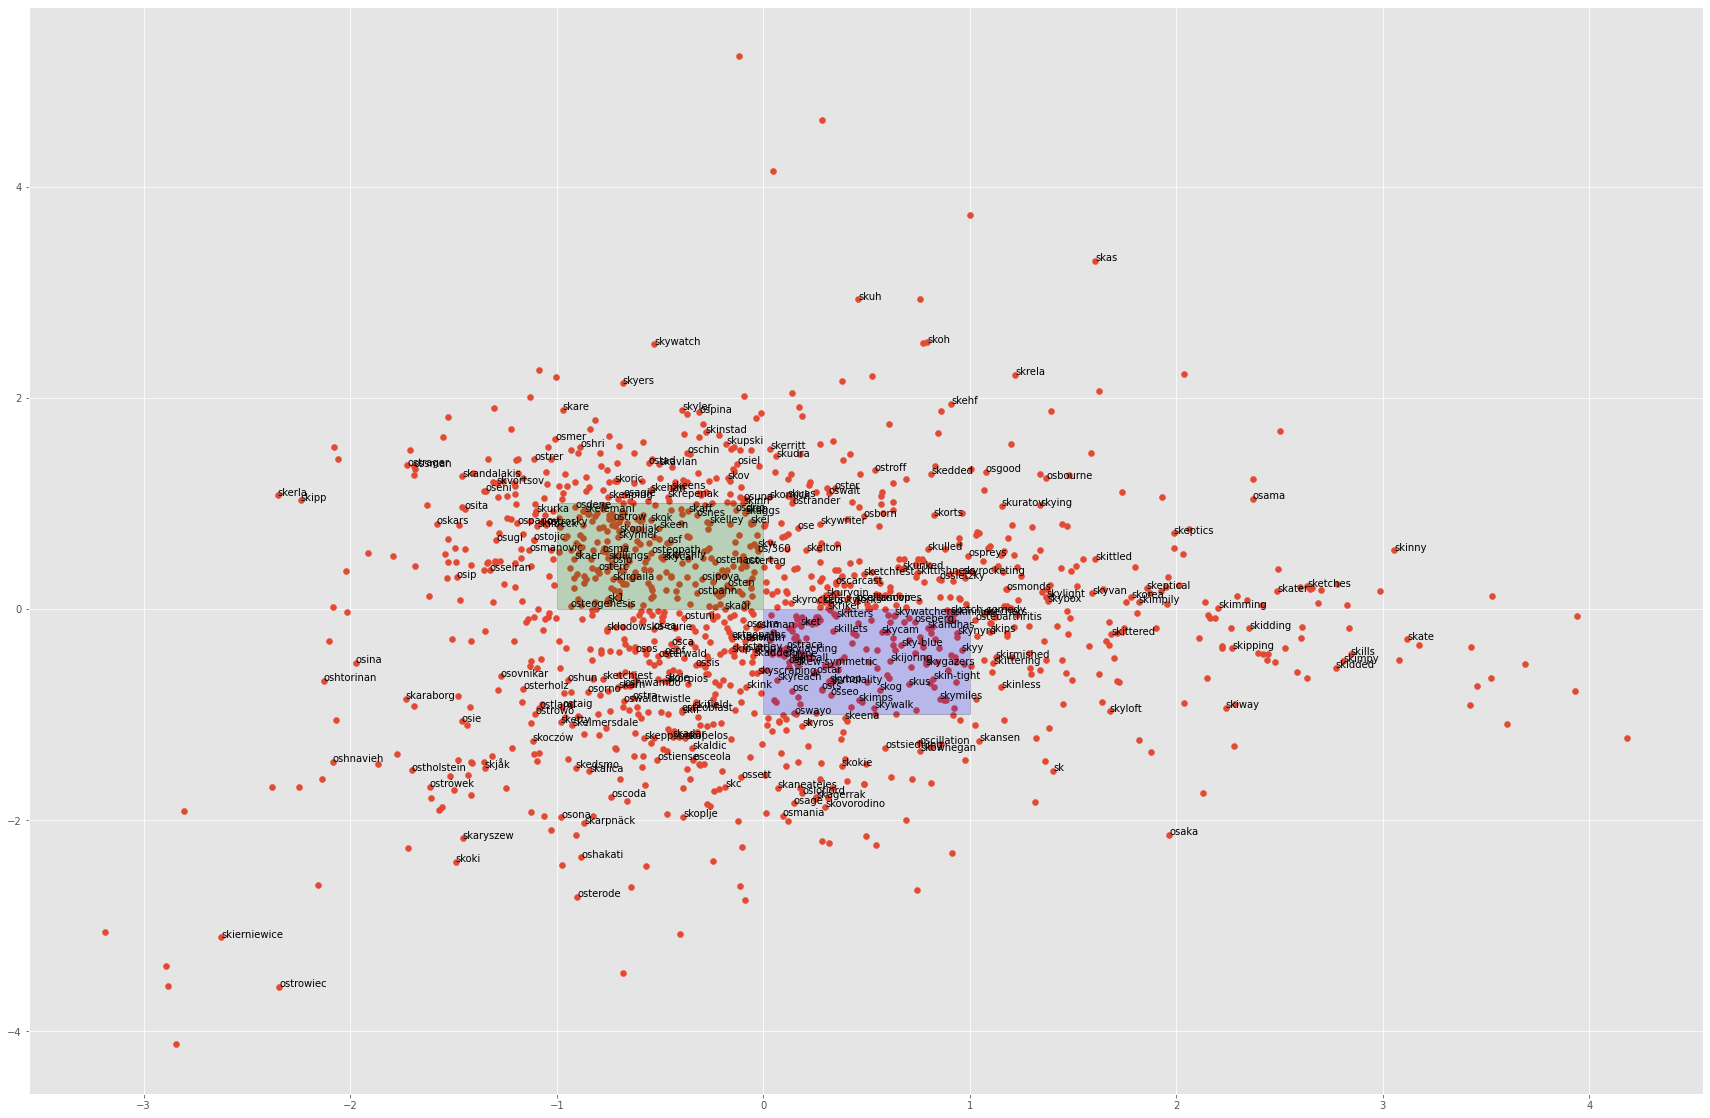

In [59]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words):
    if i % 5 == 0:
        ax.annotate(w, (os_embs_2[i, 0], os_embs_2[i, 1]))
ax.scatter(os_embs_2[:,0], os_embs_2[:,1])
ax.add_patch(Rectangle((0, -1),1, 1, alpha=0.2, facecolor="blue", edgecolor="black", linewidth=1, linestyle='solid'))
ax.add_patch(Rectangle((-1, 0),1, 1, alpha=0.2, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'))

In [57]:
os_embs_close1 = np.array([os_embs_2[ind] for ind, word in enumerate(os_words) if (0 < os_embs_2[ind][0] < 1) and ((-1 < os_embs_2[ind][1] < 0))])
os_words_close1 = np.array([word for ind, word in enumerate(os_words) if (0 < os_embs_2[ind][0] < 1) and ((-1 < os_embs_2[ind][1] < 0))])


(143, 2)


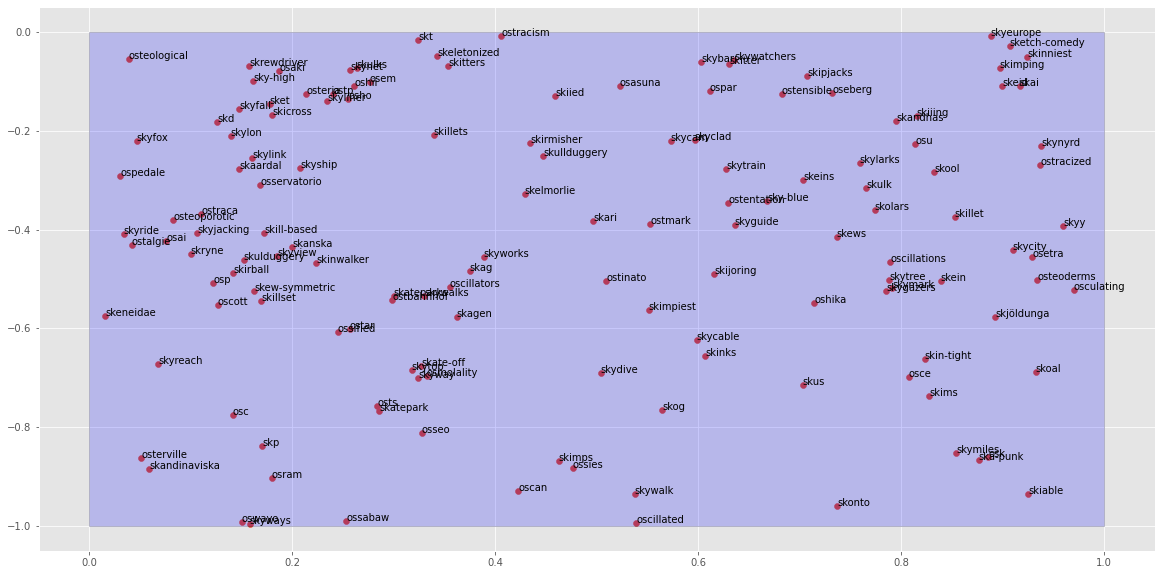

In [60]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words_close1):
    if i % 1 == 0:
        ax.annotate(w, (os_embs_close1[i, 0], os_embs_close1[i, 1]))
ax.scatter(os_embs_close1[:,0], os_embs_close1[:,1])
ax.add_patch(Rectangle((0, -1),1, 1, alpha=0.2, facecolor="blue", edgecolor="black", linewidth=1, linestyle='solid'))

In [61]:
os_embs_close_green = np.array([os_embs_2[ind] for ind, word in enumerate(os_words) if (-1 < os_embs_2[ind][0] < 0) and (0 < os_embs_2[ind][1] < 1)])
os_words_close_green = np.array([word for ind, word in enumerate(os_words) if (-1 < os_embs_2[ind][0] < 0) and (0 < os_embs_2[ind][1] < 1)])

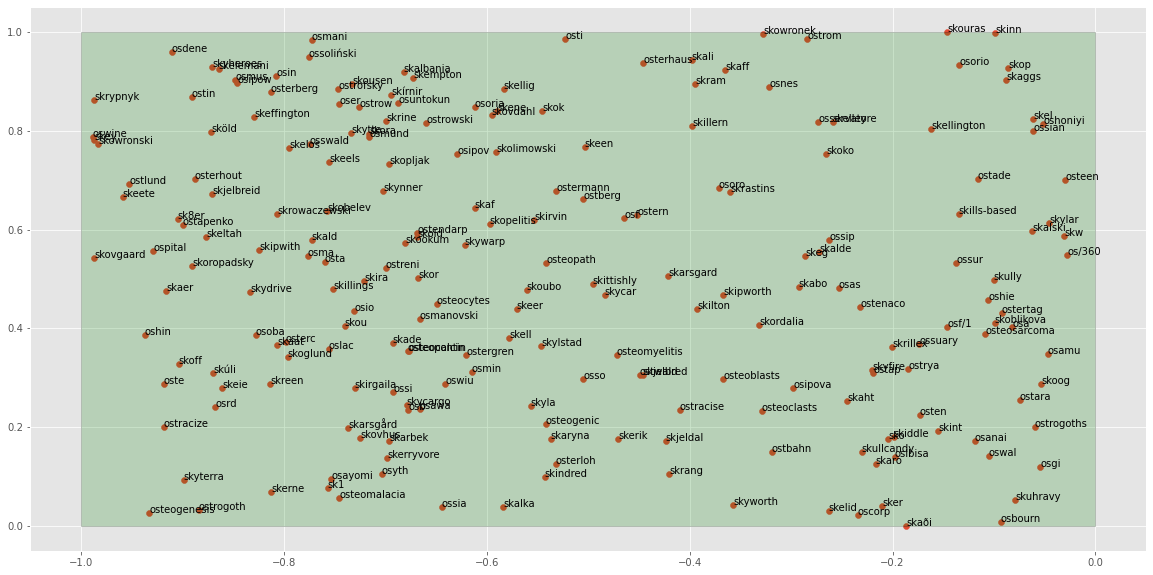

In [64]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words_close_green):
    if i % 1 == 0:
        ax.annotate(w, (os_embs_close_green[i, 0], os_embs_close_green[i, 1]))
ax.scatter(os_embs_close_green[:,0], os_embs_close_green[:,1])
ax.add_patch(Rectangle((-1, 0),1, 1, alpha=0.2, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'))

### B. Напишите функцию предобработки и токенизации отзывов

In [65]:
train_texts_path = "./filimdb_evaluation/FILIMDB/train.texts"
train_labels_path = "./filimdb_evaluation/FILIMDB/train.labels"

with open(train_texts_path, 'r', encoding='utf-8',) as inp:
    train_texts = list(map(str.strip, inp.readlines()))
with open(train_labels_path, 'r', encoding='utf-8',) as inp:
    train_labels = list(map(str.strip, inp.readlines()))